In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
def generate_config(x0 = 0, y0 = 20, n = 30, dx = 1.):
    """Returns the initial configuration of the n chained particles, which is a horizontal line.
    The function returns an array, which has n elements, where each element is a tuple consisting
    of the x- and y-component of the respective particle. The x-coordinates are evenly spaced and
    the y-coordinates are set to some constant y0
    
    Parameters
    ----------
    x0 - x-coordinate of first particle. Standard value is 0.
    y0 - y-coordinate of all particles. Standard value is 20.
    n  - Number of particles, standard value is set to 30.
    dx - Horizontal spacing between neighbouring particles. Standard value is 1
    """
    
    r = np.zeros((n, 2))
    v = np.zeros((n, 2))
    r[:, 0] = np.linspace(x0, x0+n*dx, n)
    r[:, 1] = np.linspace(y0, y0, n)
    
    return r, v

In [4]:
def potential_gradient(r, g = 9.81 , k = 20.):
    
    """Calculates the potential gradient for a given spatial configuration r of n particles in a chain.
    Returns a vector, where the i-th entry is a tuple consisting of the x- and y-coordinate of the gradient for particle i.
    Because the first and last particle are fixed, this function only computes the gradient for the second to the second-to-last particle,
    while for the first and last particle the gradient is always 0.
    
    Parameters
    ----------S
    r - Array that has n-elements and each element has two scalar entries.
    g - Gravitational constant. Default value is 9.81.
    k - Spring constant. Default value is 20.
    """
    n = len(r)
    harmonic_gradient = np.zeros((n,2))
    gravitational_gradient = np.zeros((n,2))
    
    harmonic_gradient[1 : -1] = k * (r[1 : -1] - r[: -2]) - k * (r[2 :] - r[1 : -1])
    gravitational_gradient[1 : -1][:,1] = g
    
    return harmonic_gradient+gravitational_gradient
        

In [5]:
def vv(potential_gradient, r_init, v_init, dt = 1/100, t_ges = 100, g=9.81, k=20.):
    
    size = int(t_ges/dt)
    n = len(r_init)
    
    r_matrix, v_matrix = np.zeros((size, n, 2)), np.zeros((size, n, 2))
    r_matrix[0], v_matrix[0] = r_init, v_init
    
    for i in range(1,size):
        
        r = r_matrix[i-1]
        v = v_matrix[i-1]
        gradient = potential_gradient(r, g, k)
        
        r_new = r + dt * v - 1/2 * dt**2 * gradient
        
        gradient_new = potential_gradient(r_new, g, k) 
        
        v_new = v - 1/2 * dt * (gradient + gradient_new)
        
        v_new[:,1][r_new[:,1]<0]*=-1
        r_new[:,1][r_new[:,1]<0]*=-1
        
        r_matrix[i], v_matrix[i] = r_new, v_new

        
    return r_matrix, v_matrix

In [6]:
r_init, v_init = generate_config()
r_matrix, v_matrix = vv(potential_gradient, r_init, v_init)

<IPython.core.display.Javascript object>


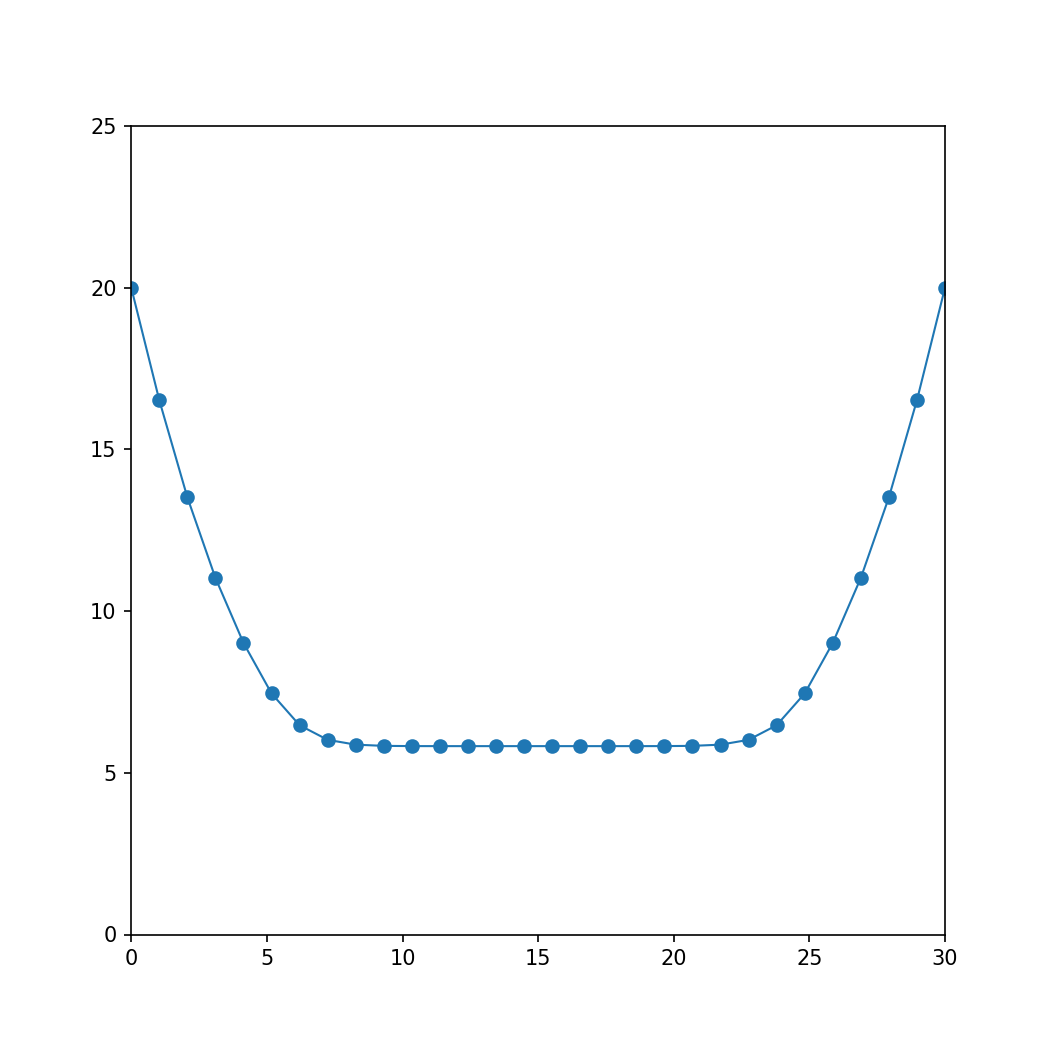

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
line, = ax.plot(r_matrix[0,:,0],r_matrix[0,:,1], '-o', lw=1)
ax.set_xlim(( 0, np.max(r_matrix[0,:,0])))
ax.set_ylim((0, np.max(r_matrix[0,:,1])+5))

def animate(i):
    index = (10*i)%len(r_matrix)
    x, y = r_matrix[index,:,0], r_matrix[index,:,1]
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, interval=200, blit=True, repeat=False)
HTML(anim.to_html5_video(embed_limit=40))